In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from keras.preprocessing import image
from sklearn.cluster import KMeans

Using TensorFlow backend.


In [2]:
image_path='Thyroid_images'
images=[os.path.join(image_path,f) for f in os.listdir(image_path)]


In [3]:
images

['Thyroid_images/304_1.jpg',
 'Thyroid_images/341_1.jpg',
 'Thyroid_images/367_2.jpg',
 'Thyroid_images/219_1.jpg',
 'Thyroid_images/118_1.jpg',
 'Thyroid_images/146_2.jpg',
 'Thyroid_images/160_1.jpg',
 'Thyroid_images/125_1.jpg',
 'Thyroid_images/77_1.jpg',
 'Thyroid_images/32_1.jpg',
 'Thyroid_images/261_1.jpg',
 'Thyroid_images/224_1.jpg',
 'Thyroid_images/339_1.jpg',
 'Thyroid_images/381_1.jpg',
 'Thyroid_images/88_2.jpg',
 'Thyroid_images/245_1.jpg',
 'Thyroid_images/200_1.jpg',
 'Thyroid_images/53_1.jpg',
 'Thyroid_images/16_1.jpg',
 'Thyroid_images/75_2.jpg',
 'Thyroid_images/144_1.jpg',
 'Thyroid_images/101_1.jpg',
 'Thyroid_images/358_1.jpg',
 'Thyroid_images/8_1.jpg',
 'Thyroid_images/320_1.jpg',
 'Thyroid_images/365_1.jpg',
 'Thyroid_images/398_1.jpg',
 'Thyroid_images/285_1.jpg',
 'Thyroid_images/179_1.jpg',
 'Thyroid_images/184_1.jpg',
 'Thyroid_images/93_1.jpg',
 'Thyroid_images/278_1.jpg',
 'Thyroid_images/367_1.jpg',
 'Thyroid_images/91_1.jpg',
 'Thyroid_images/186_1.j

In [4]:
input_image=[]
for imgs in images:
    #print(imgs)
    img=image.load_img(imgs,target_size=(224,224,3))
    img=image.img_to_array(img)
    img=img/255
    input_image.append(img)

In [5]:
Input_image=np.array(input_image)
Input_image.shape

(480, 224, 224, 3)

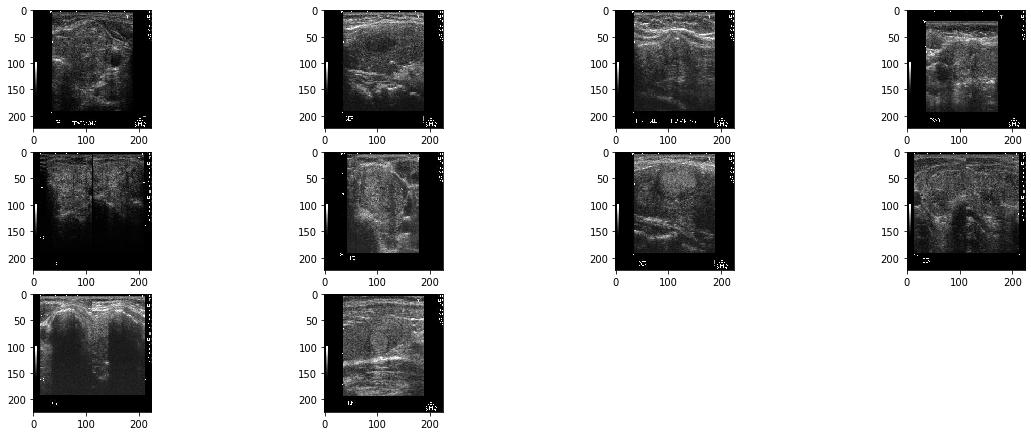

In [6]:
i=0
plt.figure(figsize=(20,10))
for imgs in Input_image[:10]:
    plt.subplot(4,4,i+1)
    plt.imshow(imgs)
    i+=1
plt.show()

In [7]:
def image_flatten(image):
    Image_flatten=[]
    for img in image:
        img_flatten=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
        Image_flatten.append(img_flatten)
    return np.array(Image_flatten)

In [8]:
X_flatten=image_flatten(Input_image[:100])

In [9]:
X_flatten[0].shape

(50176, 3)

In [10]:
segmented_image=[]
for im in X_flatten:
        km=KMeans(n_clusters=50).fit(im)
        seg=km.cluster_centers_[km.labels_]
        img_seg=seg.reshape(224,224,3)
        segmented_image.append(img_seg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


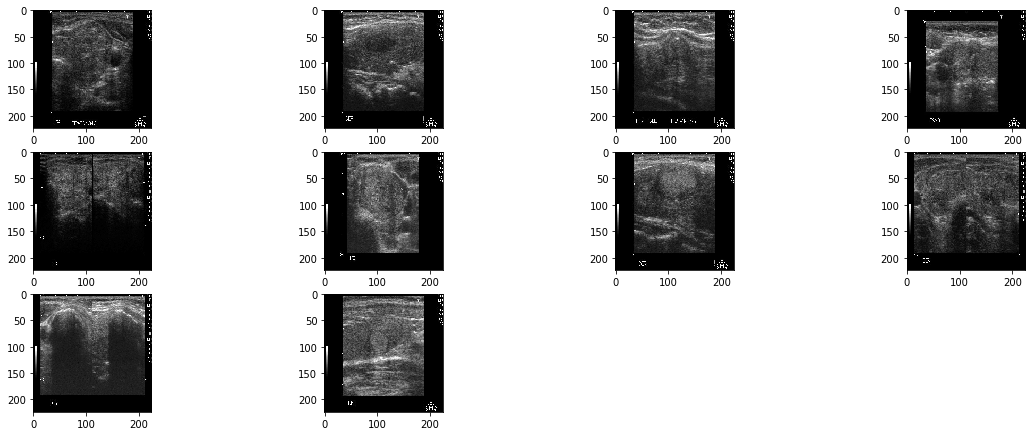

In [11]:
i=0
plt.figure(figsize=(20,10))
for seg in segmented_image[:10]:
    plt.subplot(4,4,i+1)
    plt.imshow(seg)
    i+=1
plt.show()